Tutorial by [Depends on the definition
](https://www.depends-on-the-definition.com/named-entity-recognition-with-bert/)

A new paradigm in natural language processing (NLP) is to select a pre-trained model and then “fine-tuning” the model with new data from your specific task.

BERT is a powerful general-purpose language model trained on “masked language modeling” that can be leveraged for the text-based machine learning tasks.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%%capture
#!pip3 install awscli awsebcli botocore==1.18.18 --upgrade

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.4.1'

In [ ]:
"""# Set the seed value all over the place to make this reproducible.
import random
import numpy as np
import torch

seed_val = 2353

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)"""

'# Set the seed value all over the place to make this reproducible.\nimport random\nimport numpy as np\nimport torch\n\nseed_val = 2353\n\nrandom.seed(seed_val)\nnp.random.seed(seed_val)\ntorch.manual_seed(seed_val)\ntorch.cuda.manual_seed_all(seed_val)'

In [ ]:
# The token can be used to access the repository
!git clone https://github.com/cariello1/BIO-NER-.git

fatal: destination path 'BIO-NER-' already exists and is not an empty directory.


In [ ]:
%cd /content/BIO-NER-

/content/BIO-NER-


In [ ]:
from preprocessing_1 import PreprocessingDocsNN
from preprocessing_1 import read_data

# TRANSFORMERS

In [ ]:
%%capture
!pip3 install transformers==2.6.0

In [ ]:
"""!git clone https://github.com/huggingface/transformers.git
!cd transformers
!pip install -e ."""

'!git clone https://github.com/huggingface/transformers.git\n!cd transformers\n!pip install -e .'

# PREPROCESSING

In [ ]:
import numpy as np
import codecs
import seaborn as sns
sns.set_style("whitegrid")
from matplotlib import pyplot as plt
from tqdm import tqdm
import tensorflow

In [ ]:
# For reproducibility
seed = 768
tf.random.set_seed(seed)

In [ ]:
# Original data in IOB format
file1 = "/content/drive/MyDrive/Data_Bio-NER/JNLPBA/original-data/train/Genia4ERtask1.iob2"
file2 = "/content/drive/MyDrive/Data_Bio-NER/JNLPBA/original-data/test/Genia4EReval1.iob2"

In [ ]:
input_train = read_data(file1)
input_test = read_data(file2)

Total number of sentences: 18546 
Total number of sentences: 3856 


In [ ]:
docs_train = PreprocessingDocsNN(input_train)
docs_test = PreprocessingDocsNN(input_test)

In [ ]:
# First sentence of dataset with both words and labels
print('This is what a sentence looks like:{}'.format(input_train[0]))

This is what a sentence looks like:[('IL-2', 'B-DNA'), ('gene', 'I-DNA'), ('expression', 'O'), ('and', 'O'), ('NF-kappa', 'B-protein'), ('B', 'I-protein'), ('activation', 'O'), ('through', 'O'), ('CD28', 'B-protein'), ('requires', 'O'), ('reactive', 'O'), ('oxygen', 'O'), ('production', 'O'), ('by', 'O'), ('5-lipoxygenase', 'B-protein'), ('.', 'O')]


In [ ]:
print("\033[1m"+"Statistics for the train set:"+'\033[0m')
print("Number of sentences: {}".format(len(docs_train.sentences)))
print("Number of tokens: {}".format(len(docs_train.tokens)))
print("Size of vocabulary: {}".format(len(docs_train.vocabulary)))
print('Tagset:', ' '.join(docs_train.tagset))
print("Number of Tags {}".format(len(docs_train.tagset)))

Statistics for the train set:
Number of sentences: 18546
Number of tokens: 492551
Size of vocabulary: 22056
Tagset: B-cell_type I-RNA I-protein I-DNA I-cell_line B-protein O B-RNA B-DNA I-cell_type B-cell_line
Number of Tags 11


# DATA VISUALIZATION

In [ ]:
sentences_len = np.array([len(s) for s in docs_train.sentences]) #list with len for each sents

In [ ]:
sen_mean = np.round(sentences_len.mean()).astype(int) 

In [ ]:
max_seq_len = 50 #timesteps

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


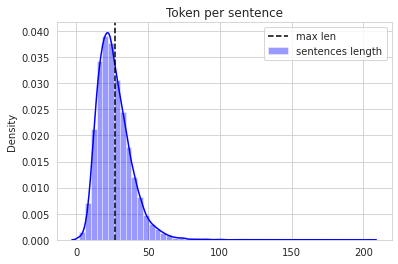

In [ ]:
sns.distplot(sentences_len, hist=True, kde=True, color="b", label="sentences length")
plt.axvline(x=sen_mean, color="k", linestyle="--", label="max len")
plt.title("Token per sentence")
plt.legend()
plt.show()

In [ ]:
sent_less_than_msl = [s for s in docs_train.sentences if len(s) <= 50]
perc_sent = round(len(sent_less_than_msl) / len(docs_train.sentences) * 100)
print("The", perc_sent,"%", "of sentences has less or equal than 50 tokens.")

The 96 % of sentences has less or equal than 50 tokens.


# PREPROCESSING FOR DP TRAINING

In [ ]:
# Vocabulary Key:Tag -> Value:ID_tag & Vocabulary Key:ID_tag -> Value:Tag
tag2idx, idx2tag = docs_train.from_labels_2_idx()

In [ ]:
# Padding and encoding the target variable
y_train = docs_train.padded_and_encoded_labels(tag2idx, max_seq_len)
y_test = docs_test.padded_and_encoded_labels(tag2idx, max_seq_len)

In [ ]:
# Decoding one-hot vectors
y_train = np.argmax(y_train, axis = -1)
y_test = np.argmax(y_test, axis = -1)

In [ ]:
y_test[0]

array([7, 7, 6, 3, 7, 1, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [ ]:
tag2idx

{'B-DNA': 9,
 'B-RNA': 8,
 'B-cell_line': 11,
 'B-cell_type': 1,
 'B-protein': 6,
 'I-DNA': 4,
 'I-RNA': 2,
 'I-cell_line': 5,
 'I-cell_type': 10,
 'I-protein': 3,
 'O': 7,
 'PAD': 0}

In [ ]:
idx2tag

{0: 'PAD',
 1: 'B-cell_type',
 2: 'I-RNA',
 3: 'I-protein',
 4: 'I-DNA',
 5: 'I-cell_line',
 6: 'B-protein',
 7: 'O',
 8: 'B-RNA',
 9: 'B-DNA',
 10: 'I-cell_type',
 11: 'B-cell_line'}

# PREPARING DATA FOR BERT

Before we can start *fine-tuning* the model, we have to prepare the data set for the use with pytorch and BERT.

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertConfig

from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

torch.__version__

'1.8.0+cu101'

Here we fix some configurations. We will limit our sequence length to 75 tokens and we will use a batch size of 32 as suggested by the Bert paper. Note, that Bert supports sequences of up to 512 tokens.

In [ ]:
bs = 32

In [ ]:
print(torch.cuda.device_count()) 

1


In [ ]:
torch.cuda.get_device_name(0)

'Tesla K80'

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()

In [ ]:
device

device(type='cuda')

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-large-cased', do_lower_case=False)

Since the BERT tokenizer is based on wordpiece tokenizer it will split tokens in subword tokens. For example ‘dexamethasone’ will be split in five tokens: ‘de’, ‘##xa’, ‘##met’, ‘##has’, ‘##one’. 
We have to deal with the issue of splitting token-level labels to related subtokens.

In [ ]:
docs_train.data[0]

[('IL-2', 'B-DNA'),
 ('gene', 'I-DNA'),
 ('expression', 'O'),
 ('and', 'O'),
 ('NF-kappa', 'B-protein'),
 ('B', 'I-protein'),
 ('activation', 'O'),
 ('through', 'O'),
 ('CD28', 'B-protein'),
 ('requires', 'O'),
 ('reactive', 'O'),
 ('oxygen', 'O'),
 ('production', 'O'),
 ('by', 'O'),
 ('5-lipoxygenase', 'B-protein'),
 ('.', 'O')]

In [ ]:
docs_train.sentences[0]

['IL-2',
 'gene',
 'expression',
 'and',
 'NF-kappa',
 'B',
 'activation',
 'through',
 'CD28',
 'requires',
 'reactive',
 'oxygen',
 'production',
 'by',
 '5-lipoxygenase',
 '.']

In [ ]:
tokenized_sentence = []
labels = []

for s in docs_train.data:
  tokens = []
  lab = []
  for word, label in s:
    tokenized_word = tokenizer.tokenize(word) #BERT tokenizer
    n_subwords = len(tokenized_word)

    # Add the tokenized word to the final tokenized word list
    tokens.extend(tokenized_word)

    # Add the same label to the new list of labels `n_subwords` times
    lab.extend([label] * n_subwords)
  tokenized_sentence.append(tokens)
  labels.append(lab)

In [ ]:
tokenized_sentence_test = []
labels_test = []

for s in docs_test.data:
  tokens = []
  lab = []
  for word, label in s:
    tokenized_word = tokenizer.tokenize(word) #BERT tokenizer
    n_subwords = len(tokenized_word)

    # Add the tokenized word to the final tokenized word list
    tokens.extend(tokenized_word)

    # Add the same label to the new list of labels `n_subwords` times
    lab.extend([label] * n_subwords)
  tokenized_sentence_test.append(tokens)
  labels_test.append(lab)

In [ ]:
tokenized_sentence[0]

['IL',
 '-',
 '2',
 'gene',
 'expression',
 'and',
 'N',
 '##F',
 '-',
 'ka',
 '##ppa',
 'B',
 'activation',
 'through',
 'CD',
 '##28',
 'requires',
 'reactive',
 'oxygen',
 'production',
 'by',
 '5',
 '-',
 'lip',
 '##ox',
 '##y',
 '##gen',
 '##ase',
 '.']

PADDING

Next, we cut and pad the token and label sequences to our desired length.

In [ ]:
input_ids = pad_sequences([tokenizer.convert_tokens_to_ids(txt) for txt in tokenized_sentence],
                          maxlen=max_seq_len, dtype="long", value=0.0,
                          truncating="post", padding="post")

In [ ]:
input_ids[0]

array([15393,   118,   123,  5565,  2838,  1105,   151,  2271,   118,
       24181, 13059,   139, 14915,  1194,  2891, 24606,  5315, 26844,
        7621,  1707,  1118,   126,   118,  4764, 10649,  1183,  4915,
        6530,   119,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0])

In [ ]:
input_ids_test = pad_sequences([tokenizer.convert_tokens_to_ids(txt) for txt in tokenized_sentence_test],
                          maxlen=max_seq_len, dtype="long", value=0.0,
                          truncating="post", padding="post")

In [ ]:
# Converting sublabels
tags = [[tag2idx.get(l) for l in lab] for lab in labels]

In [ ]:
tags_test = [[tag2idx.get(l) for l in lab] for lab in labels_test]

PADDING LABELS

In [ ]:
tags = pad_sequences(tags,
                     maxlen=max_seq_len, value=tag2idx["PAD"], padding="post",
                     dtype="long", truncating="post")

In [ ]:
tags_test = pad_sequences(tags_test,
                     maxlen=max_seq_len, value=tag2idx["PAD"], padding="post",
                     dtype="long", truncating="post")

In [ ]:
tags[0]

array([9, 9, 9, 4, 7, 7, 6, 6, 6, 6, 6, 3, 7, 7, 6, 6, 7, 7, 7, 7, 7, 6,
       6, 6, 6, 6, 6, 6, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

The mask tensor allows the model to ignore the padded elements in the sequences.

In [ ]:
attention_masks = [[float(i != 0.0) for i in ii] for ii in input_ids]

In [ ]:
attention_masks_test = [[float(i != 0.0) for i in ii] for ii in input_ids_test]

In [ ]:
#attention_masks[0]

# SPLITTING TRAIN AND VALIDATION SET

In [ ]:
tr_inputs, val_inputs, tr_tags, val_tags = train_test_split(input_ids, tags,
                                                            random_state=2018, test_size=0.1)
tr_masks, val_masks, _, _ = train_test_split(attention_masks, input_ids,
                                             random_state=2018, test_size=0.1)

In [ ]:
tr_inputs[0]

array([ 1188,  3606, 11363, 19540,  1104,  3908, 18091,   140,  1161,
        1477,   116,  1194,  1664,   118, 10323,   118,  5400,  1181,
        1105, 27453,  1477,   116,   118,  3510,  1895,   140,  1161,
        1477,   116,  6412,  1104,  1103, 13441, 10936,   119,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0])

Since we’re operating in pytorch, we have to convert the dataset to torch tensors.

In [ ]:
# Make tensors
tr_inputs = torch.tensor(tr_inputs)
val_inputs = torch.tensor(val_inputs)
tr_tags = torch.tensor(tr_tags)
val_tags = torch.tensor(val_tags)
tr_masks = torch.tensor(tr_masks)
val_masks = torch.tensor(val_masks)

In [ ]:
# Make tensors
test_input =  torch.tensor(input_ids_test)
test_masks = torch.tensor(attention_masks_test)

In [ ]:
test_data = TensorDataset(test_input, test_masks)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=bs)

In [ ]:
train_data = TensorDataset(tr_inputs, tr_masks, tr_tags)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=bs)

valid_data = TensorDataset(val_inputs, val_masks, val_tags)
valid_sampler = SequentialSampler(valid_data)
valid_dataloader = DataLoader(valid_data, sampler=valid_sampler, batch_size=bs)

In [ ]:
train_dataloader.dataset.tensors[0]

tensor([[ 1188,  3606, 11363,  ...,     0,     0,     0],
        [  140, 15499,  2604,  ...,     0,     0,     0],
        [ 1109, 16143,  1116,  ...,  5565, 17110,  1116],
        ...,
        [ 1457,  4060,  6856,  ...,     0,     0,     0],
        [ 1650,  7577,   117,  ...,     0,     0,     0],
        [  138,  7300,  1193,  ...,  2271,   118, 24181]])

# MODEL FINE-TUNING

The transformer package provides a BertForTokenClassification class for token-level predictions. BertForTokenClassification is a fine-tuning model that wraps BertModel and adds a token-level classifier on top of the BertModel. The token-level classifier is a linear layer that takes as input the last hidden state of the sequence. We load the pre-trained bert-base-cased model and provide the number of possible labels.



In [ ]:
!pip install adamp --upgrade

Requirement already up-to-date: adamp in /usr/local/lib/python3.7/dist-packages (0.3.0)


In [ ]:
import transformers
from transformers import BertForTokenClassification, AdamW

transformers.__version__

'2.6.0'

In [ ]:
# Load pretrained BertForTokenClassification model
model = BertForTokenClassification.from_pretrained(
    "bert-large-cased",
    num_labels=len(tag2idx),
    output_attentions = False,
    output_hidden_states = False,
    force_download = True

)

In [ ]:
%%capture
model.cuda()

In [ ]:
FULL_FINETUNING = True
if FULL_FINETUNING:
    param_optimizer = list(model.named_parameters())
    no_decay = ['bias', 'gamma', 'beta']
    optimizer_grouped_parameters = [
        {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
         'weight_decay_rate': 0.01},
        {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
         'weight_decay_rate': 0.0}
    ]
else:
    param_optimizer = list(model.classifier.named_parameters())
    optimizer_grouped_parameters = [{"params": [p for n, p in param_optimizer]}]

optimizer = AdamW(
    optimizer_grouped_parameters, 
    lr=5e-5,
    #eps=1e-8
)

We also add a scheduler to linearly reduce the learning rate throughout the epochs.


In [ ]:
from transformers import get_linear_schedule_with_warmup

epochs = 3
max_grad_norm = 1.0

# Total number of training steps is number of batches * number of epochs
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps  e
)

# TRAINING

In [ ]:
%%capture
!pip3 install seqeval

In [ ]:
from seqeval.metrics import f1_score, accuracy_score
from tqdm import tqdm, trange

In [ ]:
output_dir = "/content/drive/MyDrive/BIO-NER-project"

In [ ]:
import os

In [ ]:
## Store the average loss after each epoch so we can plot them.
loss_values, validation_loss_values = [], []
valid_f1_prev = 0
for epoch in trange(epochs):
    # ========================================
    #               Training
    # ========================================
    # Perform one full pass over the training set.

    # Put the model into training mode.
    model.train()
    # Reset the total loss for this epoch.
    total_loss = 0

    # Training loop
    for step, batch in enumerate(train_dataloader):
        # add batch to gpu
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch
        # Always clear any previously calculated gradients before performing a backward pass.
        model.zero_grad()
        # forward pass
        # This will return the loss (rather than the model output)
        # because we have provided the `labels`.
        outputs = model(b_input_ids, token_type_ids=None,
                        attention_mask=b_input_mask, labels=b_labels)
        # get the loss
        loss = outputs[0]
        # Perform a backward pass to calculate the gradients.
        loss.backward()
        # track train loss
        total_loss += loss.item()
        # Clip the norm of the gradient
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(parameters=model.parameters(), max_norm=max_grad_norm)
        # update parameters
        optimizer.step()
        # Update the learning rate.
        scheduler.step()


    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)
    print("Average train loss: {}".format(avg_train_loss))

    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)


    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    # Put the model into evaluation mode
    model.eval()
    # Reset the validation loss for this epoch.
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0
    predictions , true_labels = [], []
    for batch in valid_dataloader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch

        # Telling the model not to compute or store gradients,
        # saving memory and speeding up validation
        with torch.no_grad():
            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have not provided labels.
            outputs = model(b_input_ids, token_type_ids=None,
                            attention_mask=b_input_mask, labels=b_labels)
        # Move logits and labels to CPU
        logits = outputs[1].detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences.
        eval_loss += outputs[0].mean().item()
        predictions.extend([list(p) for p in np.argmax(logits, axis=2)])
        true_labels.extend(label_ids)

    

    eval_loss = eval_loss / len(valid_dataloader)
    validation_loss_values.append(eval_loss)
    print("Validation loss: {}".format(eval_loss))
    pred_tags = [[idx2tag[p_i] for p_i,l_i in zip(p, l) if idx2tag[l_i] != "PAD"] for p,l in zip(predictions, true_labels)]
    valid_tags = [[idx2tag[l_i] for l_i in s if idx2tag[l_i] != "PAD"] for s in true_labels ]
    valid_acc = accuracy_score(pred_tags, valid_tags)
    valid_f1 = f1_score(pred_tags, valid_tags)

    print("Validation Accuracy: {}".format(valid_acc))
    print("Validation F1-Score: {}".format(valid_f1))
    print()

    # Save model with best F1 
    if valid_f1 > valid_f1_prev:
        # model_to_save = model.module if hasattr(model, 'module') else model  # Only save the model it-self
        torch.save({'epoch': epoch, 'model_state': model.state_dict(), 'valid_acc': valid_acc,
    'valid_f1': valid_f1, 'max_seq_length': max_seq_len},  # Save a checkpoint
            os.path.join(output_dir, 'ner_bert_checkpoint.pt'))
        valid_f1_prev = valid_f1


  0%|          | 0/3 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:155: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:1005.)
  exp_avg.mul_(beta1).add_(1.0 - beta1, grad)


Average train loss: 0.393123296970837
Validation loss: 0.24564907160298577
Validation Accuracy: 0.9183214577736246
Validation F1-Score: 0.8179249091643116



 33%|███▎      | 1/3 [17:21<34:43, 1041.88s/it]

Average train loss: 0.20007313418262762
Validation loss: 0.21977443787558326
Validation Accuracy: 0.9263228594790328
Validation F1-Score: 0.8424508391678672



 67%|██████▋   | 2/3 [34:43<17:21, 1041.68s/it]

Average train loss: 0.13482766960287232
Validation loss: 0.23094510749496264
Validation Accuracy: 0.9296373087256161
Validation F1-Score: 0.8497042211156044



100%|██████████| 3/3 [52:06<00:00, 1042.23s/it]


# EVAL VISUALIZATION ON VALIDATION SET

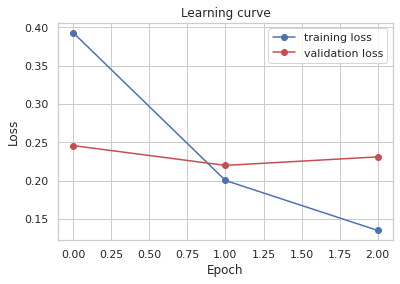

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='whitegrid')

# Plot the learning curve.
plt.plot(loss_values, 'b-o', label="training loss")
plt.plot(validation_loss_values, 'r-o', label="validation loss")

# Label the plot.
plt.title("Learning curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()


In [ ]:
from seqeval.metrics import classification_report

print(classification_report(pred_tags, valid_tags))

              precision    recall  f1-score   support

         DNA       0.84      0.76      0.80      2651
         RNA       0.82      0.83      0.83       283
   cell_line       0.76      0.72      0.74      1087
   cell_type       0.79      0.78      0.78      1435
     protein       0.90      0.87      0.89      9845

   micro avg       0.87      0.83      0.85     15301
   macro avg       0.82      0.79      0.81     15301
weighted avg       0.87      0.83      0.85     15301



# PREDICTION ON INDIPENDENT TEST SET

In [ ]:
X_test = docs_test.sentences

In [ ]:
input_ids_test1 = torch.tensor(input_ids_test).cuda()

In [ ]:
input_ids_test1

tensor([[ 7421,  1104,   176,  ...,     0,     0,     0],
        [ 1109,  2025,  7160,  ..., 14794,  5796,   119],
        [ 1130,  1103,   181,  ...,  1107,  1103,  1269],
        ...,
        [ 7715,  4272,  3438,  ...,     0,     0,     0],
        [18732, 15517,  2162,  ...,     0,     0,     0],
        [ 1135,  1110, 14255,  ...,  3052,   117, 12641]], device='cuda:0')

In [ ]:
# Load model checkpoint
checkpoint = torch.load(output_dir+'/ner_bert_checkpoint.pt', map_location='cpu')

epoch = checkpoint['epoch']
valid_acc_prev = checkpoint['valid_acc']
valid_f1_prev = checkpoint['valid_f1']

model = BertForTokenClassification.from_pretrained("bert-large-cased", state_dict=checkpoint['model_state'], num_labels=len(tag2idx))
model.to(device)
print('Loaded the pretrained BERT model, epoch:',checkpoint['epoch'],'valid acc:', round(checkpoint['valid_acc'], 3), 'valid f1:', round(checkpoint['valid_f1'], 3))


Loaded the pretrained BERT model, epoch: 2 valid acc: 0.93 valid f1: 0.85


In [ ]:
predictions = []

with torch.no_grad():
  for batch in test_dataloader:
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask = batch
    outputs = model(b_input_ids, attention_mask=b_input_mask)
    _, predicted = torch.max(outputs[0], -1)
    predictions.extend(predicted.tolist())

In [ ]:
converted = []
for sent in input_ids_test1:
  sent1 = tokenizer.convert_ids_to_tokens(sent.to('cpu'))
  converted.append(sent1)

In [ ]:
converted[0]

['Number',
 'of',
 'g',
 '##lu',
 '##co',
 '##cor',
 '##tic',
 '##oid',
 'receptors',
 'in',
 'l',
 '##ymph',
 '##ocytes',
 'and',
 'their',
 'sensitivity',
 'to',
 'hormone',
 'action',
 '.',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]']

# POST-PROCESSING

In [ ]:
# Take track of original tokenization appending original indices in a list

list_tok_to_orig = []
list_all_tok = []
list_orig_to_tok = []
for s in docs_test.sentences:
  tok_to_orig_index = []
  orig_to_tok_index = []
  all_doc_tokens = []
  for (i, token) in enumerate(s):
    orig_to_tok_index.append(len(all_doc_tokens))
    sub_tokens = tokenizer.tokenize(token)
    for sub_token in sub_tokens:
      tok_to_orig_index.append(i)
      all_doc_tokens.append(sub_token)
  list_tok_to_orig.append(tok_to_orig_index)
  list_all_tok.append(all_doc_tokens)
  list_orig_to_tok.append(orig_to_tok_index)

In [ ]:
for i, token, l in zip(list_tok_to_orig[0], list_all_tok[0], predictions[0]):
  print(i, token, l)

0 Number 7
1 of 7
2 g 6
2 ##lu 6
2 ##co 6
2 ##cor 6
2 ##tic 6
2 ##oid 6
3 receptors 3
4 in 7
5 l 1
5 ##ymph 1
5 ##ocytes 1
6 and 7
7 their 7
8 sensitivity 7
9 to 7
10 hormone 7
11 action 7
12 . 7


In [ ]:
# Detokenization : Restore the original token sequences

original_test_sentence, y_hat, y_true = [], [], []
for sent, i, lidx, lidtrue in zip(list_all_tok, list_tok_to_orig, predictions, tags_test):
  position = None
  new_tokens, new_labels_hat, new_labels_true = [], [], []
  for token, j, label_idx, label_idx_true in zip(sent, i, lidx, lidtrue):
    if position == j:
      new_tokens[-1] = new_tokens[-1] + token
    else:
      new_labels_hat.append(idx2tag[label_idx])
      new_labels_true.append(idx2tag[label_idx_true])
      new_tokens.append(token)
      position = j
  original_test_sentence.append(new_tokens)
  original_test_sentence = [[item.replace("##", "") for item in s] for s in original_test_sentence]
  y_hat.append(new_labels_hat)
  y_true.append(new_labels_true)

In [ ]:
y_hat[0]

['O',
 'O',
 'B-protein',
 'I-protein',
 'O',
 'B-cell_type',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O']

In [ ]:
y_true[0]

['O',
 'O',
 'B-protein',
 'I-protein',
 'O',
 'B-cell_type',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O']

In [ ]:
original_test_sentence[0]

['Number',
 'of',
 'glucocorticoid',
 'receptors',
 'in',
 'lymphocytes',
 'and',
 'their',
 'sensitivity',
 'to',
 'hormone',
 'action',
 '.']

# EVAL ON TEST SET

In [ ]:
print('\033[1m' + "Classification report for BERT: ")
print('\033[0m')
print(classification_report(y_true, y_hat))

Classification report for BERT: 

              precision    recall  f1-score   support

         DNA       0.66      0.74      0.70       972
         RNA       0.63      0.73      0.68       106
   cell_line       0.51      0.70      0.59       429
   cell_type       0.72      0.69      0.71      1734
     protein       0.66      0.81      0.73      4665

   micro avg       0.66      0.77      0.71      7906
   macro avg       0.63      0.74      0.68      7906
weighted avg       0.66      0.77      0.71      7906



In [ ]:
print("F1-score(relaxed): {:0.3}".format(f1_score(y_true, y_hat, average = "weighted")))

F1-score(relaxed): 0.712


In [ ]:
from seqeval.scheme import IOB2
print('\033[1m' + "Classification report for BERT: ")
print('\033[0m')
print(classification_report(y_true, y_hat,scheme=IOB2, mode="strict"))

Classification report for BERT: 

              precision    recall  f1-score   support

         DNA       0.70      0.74      0.72       972
         RNA       0.69      0.73      0.71       106
   cell_line       0.55      0.70      0.61       429
   cell_type       0.75      0.69      0.72      1734
     protein       0.67      0.81      0.74      4665

   micro avg       0.68      0.77      0.72      7906
   macro avg       0.67      0.73      0.70      7906
weighted avg       0.69      0.77      0.72      7906



In [ ]:
from seqeval.scheme import IOB2
print("F1-score: {:0.3}".format(f1_score(y_true, y_hat, average = "weighted", scheme=IOB2, mode="strict")))

F1-score: 0.723


# COMPARE RESULTS

In [ ]:
i = 18
print("{:15} {:5}: ({})".format("Word", "True", "Pred"))
print("="*45)
for w, true, pred in zip(original_test_sentence[i], y_true[i], y_hat[i]):
  print("{:15}:{:15} ({})".format(w, true, pred))

Word            True : (Pred)
However        :O               (O)
,              :O               (O)
there          :O               (O)
was            :O               (O)
a              :O               (O)
significantly  :O               (O)
positive       :O               (O)
association    :O               (O)
between        :O               (O)
tumor          :B-protein       (B-protein)
beta           :I-protein       (I-protein)
2-M            :I-protein       (I-protein)
expression     :O               (O)
and            :O               (O)
the            :O               (O)
degree         :O               (O)
of             :O               (O)
lymphocytic    :O               (O)
infiltration   :O               (O)
in             :O               (O)
the            :O               (O)
tumor          :O               (O)
tissue         :O               (O)
.              :O               (O)


#  LR OPTIMIZATION

In [ ]:
%%capture
!pip install torch-lr-finder

In [ ]:
from torch_lr_finder import LRFinder

In [ ]:
"""train_data = TensorDataset(tr_inputs, tr_tags)
train_dataloader = DataLoader(train_data, batch_size=bs)"""

'train_data = TensorDataset(tr_inputs, tr_tags)\ntrain_dataloader = DataLoader(train_data, batch_size=bs)'

In [ ]:
model.parameters()

<generator object Module.parameters at 0x7f3efa59d2d0>

In [ ]:
train_dataloader

In [ ]:
import torch.nn as nn
class LossWrapper(nn.Module):
    def __init__(self, loss_fn):
        super().__init__()
        self.loss_fn = loss_fn

    def forward(self, outputs, labels):
        logits = outputs[1]  # logits only
        return self.loss_fn(logits, labels.view(-1))

In [ ]:
"""# Then, just replace the original criterion with this wrapper
#criterion = nn.CrossEntropyLoss()
#optimizer = optim.Adam(model.parameters(), lr=1e-7, weight_decay=1e-2)
optimizer2 = torch.optim.Adam(model.parameters(), lr=1e-7, weight_decay=1e-2)
criterion = LossWrapper(nn.CrossEntropyLoss())
lr_finder = LRFinder(model, optimizer2, criterion, device="cpu")
lr_finder.range_test(train_dataloader, end_lr=100, num_iter=100)
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state"""

'# Then, just replace the original criterion with this wrapper\n#criterion = nn.CrossEntropyLoss()\n#optimizer = optim.Adam(model.parameters(), lr=1e-7, weight_decay=1e-2)\noptimizer2 = torch.optim.Adam(model.parameters(), lr=1e-7, weight_decay=1e-2)\ncriterion = LossWrapper(nn.CrossEntropyLoss())\nlr_finder = LRFinder(model, optimizer2, criterion, device="cpu")\nlr_finder.range_test(train_dataloader, end_lr=100, num_iter=100)\nlr_finder.plot() # to inspect the loss-learning rate graph\nlr_finder.reset() # to reset the model and optimizer to their initial state'

# REPORT2

In [ ]:
print('\033[1m' + "Classification report for #2 model with LR optimization: ")
print('\033[0m')
print(classification_report(y_true, y_hat))

Classification report for #2 model with LR optimization: 

              precision    recall  f1-score   support

         DNA       0.66      0.74      0.70       972
         RNA       0.63      0.73      0.68       106
   cell_line       0.51      0.70      0.59       429
   cell_type       0.72      0.69      0.71      1734
     protein       0.66      0.81      0.73      4665

   micro avg       0.66      0.77      0.71      7906
   macro avg       0.63      0.74      0.68      7906
weighted avg       0.66      0.77      0.71      7906



In [ ]:
print("F1-score(relaxed): {:0.3}".format(f1_score(y_true, y_hat, average = "weighted")))

F1-score(relaxed): 0.712


In [ ]:
print('\033[1m' + "Classification report for #1 model without LR optimization (exact match): ")
print('\033[0m')
print(classification_report(y_true, y_hat, scheme=IOB2, mode="strict"))

Classification report for #1 model without LR optimization (exact match): 

              precision    recall  f1-score   support

         DNA       0.70      0.74      0.72       972
         RNA       0.69      0.73      0.71       106
   cell_line       0.55      0.70      0.61       429
   cell_type       0.75      0.69      0.72      1734
     protein       0.67      0.81      0.74      4665

   micro avg       0.68      0.77      0.72      7906
   macro avg       0.67      0.73      0.70      7906
weighted avg       0.69      0.77      0.72      7906



In [ ]:
print("F1-score: {:0.3}".format(f1_score(y_true, y_hat, average = "weighted", scheme=IOB2, mode="strict")))

F1-score: 0.723


In [ ]:
import sys

print('Saving classification report on file...')

original_stdout = sys.stdout 

with open('/content/drive/MyDrive/output.txt', 'a') as f:
  sys.stdout = f # Change the standard output to the file we created.
  print('\033[1m' + "Classification report BERT model for JNLPBA dataset: ")
  print('\033[0m')
  print(classification_report(y_true, y_hat))
  sys.stdout = original_stdout # Reset the standard output to its original value
print("Done.")

Saving classification report on file...
Done.
